#### Сгенерировать датасет при помощи sklearn.datasets.make_regression и обучить линейную модель при помощи градиентного и стохастического градиентного спуска. Нанести среднеквадратичную ошибку для обоих методов на один график, сделать выводы о разнице скорости сходимости каждого из методов.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn import datasets

In [3]:
# сгенерируем набор данных
data, target, coef = datasets.make_regression(n_samples=10000, n_features = 2, n_informative = 2, n_targets = 1, 
                                              noise = 7, coef = True, random_state = 2)

In [4]:
data

array([[-2.75161769e-01,  3.88051923e-01],
       [-7.39931870e-01,  6.41540019e-01],
       [ 1.73259956e+00,  1.38746003e+00],
       ...,
       [ 9.95690738e-02,  1.14050425e+00],
       [ 5.72821025e-01, -1.62061166e-03],
       [-8.10975181e-01, -7.90286210e-01]])

In [5]:
coef

array([47.46102593,  1.66486956])

In [6]:
# средние значения и стандартное отклонение по столбцам
 
means = np.mean(data, axis=0)
stds = np.std(data, axis=0)
# параметр axis указывается для вычисления значений по столбцам, а не по всему массиву
#(см. документацию в разделе источников)
 
# вычтем каждое значение признака из среднего и поделим на стандартное отклонение
for i in range(data.shape[0]):
    for j in range(data.shape[1]):
        data[i][j] = (data[i][j] - means[j])/stds[j]

In [7]:
means

array([ 0.00125508, -0.002508  ])

In [8]:
stds

array([0.99518458, 1.01311336])

In [9]:
data

array([[-2.77754356e-01,  3.85504659e-01],
       [-7.44773351e-01,  6.35711699e-01],
       [ 1.73972197e+00,  1.37197680e+00],
       ...,
       [ 9.87897050e-02,  1.12821753e+00],
       [ 5.74331592e-01,  8.75901031e-04],
       [-8.16160421e-01, -7.77581502e-01]])

In [10]:
# реализуем функцию, определяющую среднеквадратичную ошибку
def mserror(X, w, y_pred):
    y = X.dot(w)
    return (sum((y - y_pred)**2)) / len(y)

In [11]:
def classic_grade(data, target, eta):

    # инициализируем начальный вектор весов
    w = np.zeros(2)
 
    # список векторов весов после каждой итерации
    w_list = [w.copy()]
 
    # список значений ошибок после каждой итерации
    global errors 
    errors = []
 
    # шаг градиентного спуска
    #eta = 0.5
 
    # максимальное число итераций
    max_iter = 1e5
 
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
 
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
 
    # счетчик итераций
    iter_num = 0
 
    np.random.seed(1234)
 
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
        # генерируем случайный индекс объекта выборки
        train_ind = np.random.randint(data.shape[0])
    
        new_w = w - 2 * eta * np.dot(data[train_ind].T, (np.dot(data[train_ind], w) - target[train_ind])) / target.shape[0]
 
        weight_dist = np.linalg.norm(new_w - w, ord=2)
    
        w_list.append(new_w.copy())
        errors.append(mserror(data, new_w, target))
    
        iter_num += 1
        w = new_w
    
    w_list = np.array(w_list)
 
    print(f'В случае использования стохастического градиентного спуска функционал ошибки составляет {round(errors[-1], 4)}')

In [12]:
def descend_grade(data, target, eta, dim):

    # инициализируем начальный вектор весов
    w_2 = np.zeros(dim)
 
    # список векторов весов после каждой итерации
    w_2_list = [w_2.copy()]
 
    # список значений ошибок после каждой итерации
    global errors_2
    errors_2 = []
 
    # шаг градиентного спуска
    #eta = 0.5
 
    # максимальное число итераций
    max_iter = 1e5
 
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
 
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
 
    # счетчик итераций
    iter_num = 0
 
    np.random.seed(1234)
 
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
        new_w_2 = w_2 - 2 * eta * np.dot(data.T, (np.dot(data, w_2) - target)) / target.shape[0]
        weight_dist = np.linalg.norm(new_w_2 - w_2, ord=2)
    
        w_2_list.append(new_w_2.copy())
        errors_2.append(mserror(data, new_w_2, target))
    
        iter_num += 1
        w_2 = new_w_2
        print(iter_num, mserror(data, new_w_2, target), eta)
    
    w_2_list = np.array(w_2_list)
 
    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_2[-1], 4)}')

In [13]:
classic_grade(data, target, 0.5)

В случае использования стохастического градиентного спуска функционал ошибки составляет 49.3459


In [14]:
descend_grade(data, target, 0.5, 2)

1 49.72346129847741 0.5
2 49.342480891283145 0.5
3 49.34241603431798 0.5
4 49.342416023277046 0.5
5 49.34241602327515 0.5
6 49.342416023275 0.5
7 49.342416023275085 0.5
В случае использования градиентного спуска функционал ошибки составляет 49.3424


Text(0, 0.5, 'MSE')

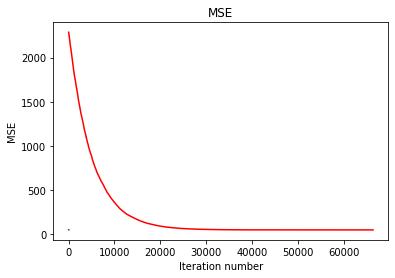

In [15]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors)), errors, c='r')
plt.plot(range(len(errors_2)), errors_2,  c='g')
plt.title('MSE')
plt.xlabel('Iteration number')
plt.ylabel('MSE')

Text(0, 0.5, 'MSE 2')

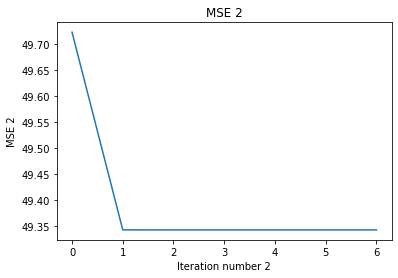

In [16]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_2)), errors_2)
plt.title('MSE 2')
plt.xlabel('Iteration number 2')
plt.ylabel('MSE 2')

#### Модифицировать решение первого задания путем добавления  𝐿2 -регуляризации (в функцию, считающую MSE, нужно добавить норму вектора весов) и сравнить результаты.

создам новую базу

In [17]:
data2, target2, coef2 = datasets.make_regression(n_samples=10000, n_features = 10, n_informative = 2, n_targets = 1, 
                                              noise = 7, coef = True, random_state = 2)

In [18]:
data2

array([[ 0.82438608,  1.16724453,  0.9157435 , ..., -0.83200863,
        -0.05811773,  0.91150297],
       [-0.37220152, -1.03124089, -1.8586448 , ...,  0.13410958,
         0.01941105,  0.47638582],
       [ 0.09373965,  0.0221904 ,  0.57317545, ...,  0.14760922,
         0.34485569,  0.4873244 ],
       ...,
       [ 1.65173442, -0.31531491,  0.6879426 , ...,  0.16373466,
         0.12989889,  0.78371353],
       [ 1.27736981,  0.41058831,  0.3174659 , ...,  0.16797567,
         0.66007136, -1.23413206],
       [-0.75916055,  2.11623757,  1.66991013, ...,  0.57323382,
        -1.38278087,  1.84935265]])

In [19]:
coef2

array([ 0.        ,  0.        ,  0.        , 90.70102586,  0.        ,
        0.        ,  0.        ,  0.        , 11.35058557,  0.        ])

In [20]:
target2

array([-34.98981486,  45.46357601, -80.45258102, ..., -98.52442639,
         8.78746983,  29.20093656])

In [22]:
descend_grade(data2, target2, 0.05, 10)

1 6856.659573143292 0.05
2 5551.65829169739 0.05
3 4497.05210048565 0.05
4 3644.7562743908293 0.05
5 2955.9277228182796 0.05
6 2399.1873463659576 0.05
7 1949.184600213773 0.05
8 1585.4383355457333 0.05
9 1291.4007018033753 0.05
10 1053.7011513319233 0.05
11 861.5358676370233 0.05
12 706.1746211119187 0.05
13 580.5624499933266 0.05
14 478.99791818019395 0.05
15 396.87321608663416 0.05
16 330.4642078296348 0.05
17 276.7608184396934 0.05
18 233.3300038720293 0.05
19 198.2050394794169 0.05
20 169.79606795713076 0.05
21 146.81782100921404 0.05
22 128.23121484471855 0.05
23 113.19615419775714 0.05
24 101.03339201838216 0.05
25 91.19370582668341 0.05
26 83.23298594944546 0.05
27 76.79210079695406 0.05
28 71.58062236302197 0.05
29 67.36367123541345 0.05
30 63.95128265375112 0.05
31 61.1898100609572 0.05
32 58.95497542169553 0.05
33 57.14625057382544 0.05
34 55.68231446606192 0.05
35 54.49738008614742 0.05
36 53.53822443560753 0.05
37 52.76178686578531 0.05
38 52.13322691434859 0.05
39 51.62435

Text(0, 0.5, 'MSE 3')

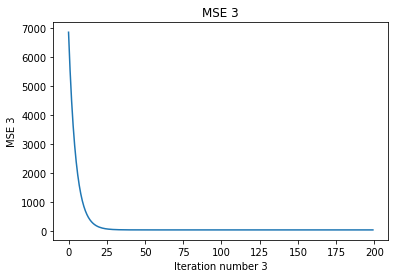

In [23]:
# Визуализируем изменение функционала ошибки
plt.plot(range(len(errors_2)), errors_2)
plt.title('MSE 3')
plt.xlabel('Iteration number 3')
plt.ylabel('MSE 3')

Сделаю регуляризацию L2, добавив в функцию штраф за большие веса

In [39]:
# перепишу функцию, определяющую среднеквадратичную ошибку с регуляризацией
def mserror_with_reg(X, w, y_pred, reg):
    y = X.dot(w)
    return (sum((y - y_pred)**2) / len(y)) + reg*sum(w**2)

In [40]:
def descend_grade_with_rwg(data, target, eta, dim, reg):

    # инициализируем начальный вектор весов
    w_3 = np.zeros(dim)
 
    # список векторов весов после каждой итерации
    w_3_list = [w_3.copy()]
 
    # список значений ошибок после каждой итерации
    global errors_3
    errors_3 = []
 
    # максимальное число итераций
    max_iter = 1e5
 
    # критерий сходимости (разница весов, при которой алгоритм останавливается)
    min_weight_dist = 1e-8
 
    # зададим начальную разницу весов большим числом
    weight_dist = np.inf
 
    # счетчик итераций
    iter_num = 0
 
    np.random.seed(1234)
 
    # ход градиентного спуска
    while weight_dist > min_weight_dist and iter_num < max_iter:
    
        new_w_3 = w_3 - 2 * eta * np.dot(data.T, (np.dot(data, w_3) - target)) / target.shape[0]
        weight_dist = np.linalg.norm(new_w_3 - w_3, ord=2)
    
        w_3_list.append(new_w_3.copy())
        errors_3.append(mserror_with_reg(data, new_w_3, target, reg))
    
        iter_num += 1
        w_3 = new_w_3
        print(iter_num, mserror_with_reg(data, new_w_3, target, reg), eta)
    
    w_3_list = np.array(w_3_list)
 
    print(f'В случае использования градиентного спуска функционал ошибки составляет {round(errors_3[-1], 4)}')

In [58]:
descend_grade_with_rwg(data2, target2, 0.5, 10, 0.0000005)

1 58.44259305246403 0.5
2 49.48371454711943 0.5
3 49.46183618891488 0.5
4 49.46177461431637 0.5
5 49.461774455383 0.5
6 49.461774454402 0.5
7 49.46177445446204 0.5
8 49.461774454460446 0.5
9 49.461774454460524 0.5
В случае использования градиентного спуска функционал ошибки составляет 49.4618
